# Inmersión de Datos - Alura LATAM

Este proyecto forma parte del *Curso Intensivo de 4 clases de Inmersión de Datos de Alura LATAM* y tiene como objetivo introducirnos al análisis de datos utilizando Python y algunas de sus librerías más poderosas, como Pandas, Seaborn y Scikit-learn (sklearn).

A través del análisis de una base de datos de inmuebles en la ciudad de Bogotá, vamos a practicar:

*   La carga y exploración de datos con Pandas
*   Visualización de variables y relaciones con Seaborn
*   Aplicación de modelos simples de machine learning con sklearn

Más allá de aprender a usar estas herramientas, el proyecto nos permite desarrollar una mirada analítica sobre los datos, detectar patrones y obtener insights útiles, en este caso, del mercado inmobiliario bogotano.

## Primera Clase

Lo primero que haremos sera conectar nuestra cuenta de Google Drive a Google Colab, así se podrá acceder a archivos que haya guardados en el Drive directamente desde la notebook.

Luego de esto importamos la libreria que se utilizará y explorará en esta primera clase, **Pandas** y crearemos un Data Frame de la base de datos elegida del cual visualizaremos las primeras 5 columnas.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

inmuebles = pd.read_csv('/content/drive/MyDrive/CURSOS/Alura Latam - Inmersion de Datos/inmuebles_bogota.csv')
inmuebles.head()

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000


In [3]:
print('Dimensiones del Data Frame: ',inmuebles.shape)
print('Info sobre las columnas: ', inmuebles.columns)


Dimensiones del Data Frame:  (9520, 8)
Info sobre las columnas:  Index(['Tipo', 'Descripcion', 'Habitaciones', 'Baños', 'Área', 'Barrio', 'UPZ',
       'Valor'],
      dtype='object')


En la descripción de las columnas se puede observar que hay dos columnas cuyo nombre podrían generar problemas por lo que se renombrarán.

In [4]:
columnas = {'Baños':'Banos','Área':'Area'}
inmuebles = inmuebles.rename(columns=columnas)
# inmuebles.sample(10)

### Exploración inicial con info()

El método DataFrame.info() nos brinda una visión general del DataFrame. Es muy útil para conocer:

*   El número total de entradas (filas)
*   El número de columnas
*   El nombre de cada columna
*   El tipo de dato (dtype) de cada columna (por ejemplo, int64, float64, object)
*   Cuántos valores no nulos hay en cada columna (sirve para detectar datos faltantes)

En este caso, al ejecutar inmuebles.info(), podemos empezar a entender la estructura de la base de datos de inmuebles en Bogotá: qué tipo de información contiene, si hay columnas con datos faltantes, y cómo están representados los datos.

In [5]:
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


### 🔢 Acceso a datos por posición con .iloc
El método .iloc[ ] nos permite acceder a filas y columnas de un DataFrame por su posición numérica (es decir, como si fuera una matriz).

Esto es útil cuando no conocés los nombres de las columnas o querés recorrer los datos por su ubicación.

Hay muchas formas de usarlo, a continuación se muestran algunas.

In [6]:
# Veamos el inmueble localizado en la fila 50
inmuebles.iloc[50]

,50
Tipo,Apartamento
Descripcion,Apartamento en venta en Cedritos
Habitaciones,2
Banos,2
Area,79
Barrio,Cedritos
UPZ,Usaquén
Valor,$ 354.000.000


In [7]:
# Veamos los inmuebles desde el 50 al 53
# Notar que esta notacion incluye el 50 pero no el 53 por lo que solo vemos hasta el 52
inmuebles.iloc[50:53]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
50,Apartamento,Apartamento en venta en Cedritos,2,2,79,Cedritos,Usaquén,$ 354.000.000
51,Apartamento,Apartamento en venta en Mazuren,3,3,92,Mazuren,El Prado,$ 372.000.000
52,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,88,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 500.000.000


In [8]:
# inmuebles.iloc[:, 0]     # Muestra la primera columna completa
# inmuebles.iloc[0, 1]     # Muestra el valor en la fila 0, columna 1

### Otras mediciones para ver

In [9]:
print('valor del inmueble 300: ',inmuebles['Valor'][300])
print('tipo del valor de los inmuebles del 300 al 304: ',type(inmuebles['Valor'][300:305]))
print('promedio de area de todos los inmuebles: ',inmuebles.Area.mean())
# print(inmuebles.sample())

valor del inmueble 300:  $ 116.100.000
tipo del valor de los inmuebles del 300 al 304:  <class 'pandas.core.series.Series'>
promedio de area de todos los inmuebles:  146.66470588235293


### Exploración por características específicas

Antes de hacer análisis más complejos, podemos explorar partes del DataFrame de forma simple usando métodos básicos de Pandas.
Esto nos ayuda a entender mejor los datos y detectar tendencias generales.

In [10]:
(inmuebles.Barrio == 'Chico Reservado')
print('cantidad de inmuebles en el barrio Chico Reservado: ', sum(inmuebles.Barrio == 'Chico Reservado'))

cantidad de inmuebles en el barrio Chico Reservado:  225


A continuación se crea una serie booleana, es decir, una columna de True o False que te dice si cada fila del DataFrame cumple con la condición de estar en el barrio "Chico Reservado".

In [11]:
inmuebles_CR = (inmuebles.Barrio == 'Chico Reservado')
# type(inmuebles_CR)

Luego, usando esa serie booleana se filtra el DataFrame. Lo que hacés es quedarte solo con las filas donde el valor es True, o sea, los inmuebles que están en el barrio "Chico Reservado".

Se crea un nuevo DataFrame (chico_reservado) contiene solo las propiedades del barrio que te interesa, y ya podés trabajar con él (ver precios, calcular promedios, etc.).

In [12]:
chico_reservado = inmuebles[inmuebles_CR]
chico_reservado.head()

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
39,Apartamento,Apartamento en venta en Chico Reservado,1,1,64,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 495.000.000
72,Apartamento,Apartamento en venta en Chico Reservado,1,1,64,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 495.000.000
126,Apartamento,Apartamento en venta en Chico Reservado,3,4,150,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.300.000.000
143,Apartamento,Apartamento en venta en Chico Reservado,2,4,104,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.100.000.000


In [13]:
print('Promedio del area en m^2 de los inmuebles en el barrio Chico Reservado: ', chico_reservado.Area.mean())
print('Promedio del area en m^2 de los inmuebles en el DF original: ', inmuebles.Area.mean())

Promedio del area en m^2 de los inmuebles en el barrio Chico Reservado:  142.78666666666666
Promedio del area en m^2 de los inmuebles en el DF original:  146.66470588235293


Veamos el dataframe agrupado por barrios y contemos cuantos datos decada barrio hay ademas de la cantidad de barrios y veamos los primeros 10 barrios

In [14]:
print('cantidad de barrios en el DF: ', len(inmuebles.Barrio.value_counts()))
print('------------------')

inmuebles.Barrio.value_counts().head(10)


cantidad de barrios en el DF:  149
------------------


,count
Barrio,
Usaquén,1105
Zona Noroccidental,877
Kennedy,589
Bosa,589
Cedritos,554
Barrios Unidos,473
Engativa,462
Suba,443
Santa Barbara,438


Veamos un grafico para visualizar mejor

<Axes: xlabel='Barrio'>

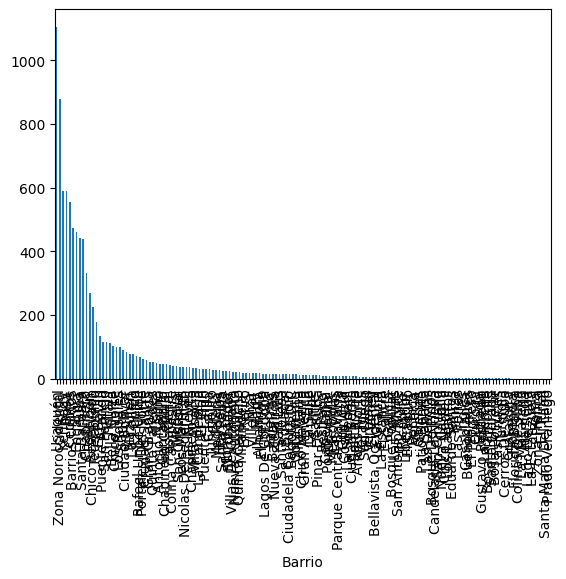

In [15]:
inmuebles_barrio = inmuebles.Barrio.value_counts()
inmuebles_barrio.plot.bar()

Notamos que como hay 149 barrios el grafico es muy sucio, podriamos recortarlo a ver solo los primeros 10 como hicimos antes.

<Axes: xlabel='Barrio'>

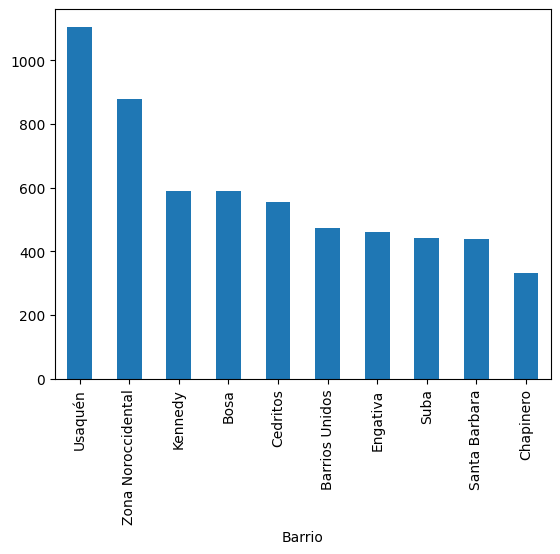

In [16]:
inmuebles_barrio.head(10).plot.bar()

## Desafío 1

1.   Promedio de área de todos los inmuebles en los barrios en el dataset. El top 10.
2.   Consultar otros datos estadísticos, conteo, mediana, valores mínimo y máximo.

<Axes: title={'center': 'promedio del area por barrio'}, xlabel='Barrio', ylabel='area en m^2'>

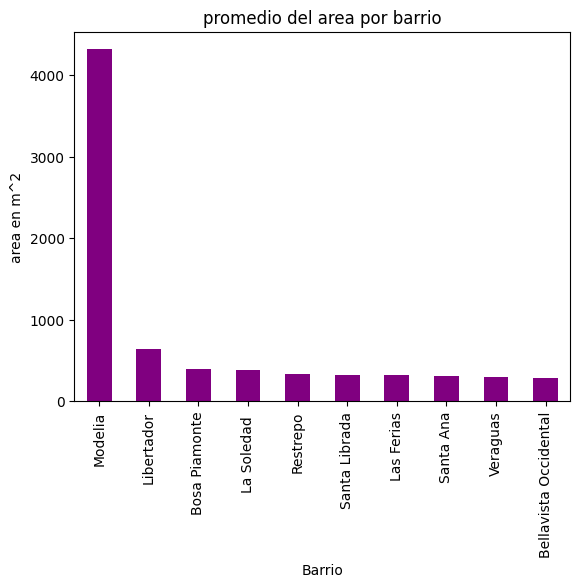

In [17]:
#punto 1
inmuebles_barrios = inmuebles.groupby('Barrio')
inmuebles_barrios.Area.mean().sort_values(ascending=False).head(10).plot.bar(title='promedio del area por barrio', ylabel='area en m^2',color='purple')

<Axes: title={'center': 'mediana del area por barrio'}, xlabel='Barrio', ylabel='Area en m^2'>

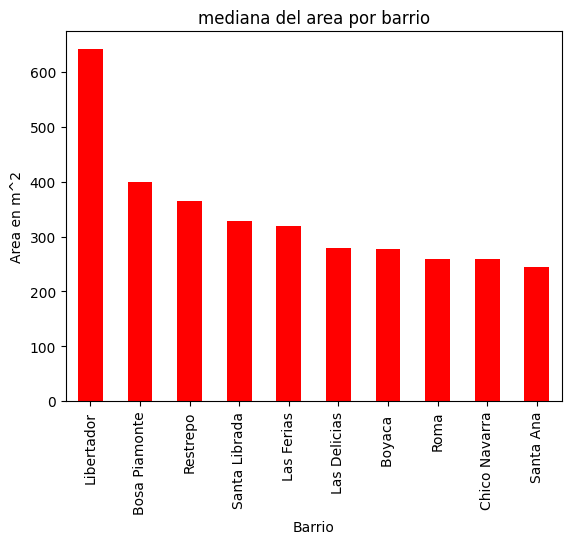

In [18]:
# punto 2
# mediana
inmuebles_barrios.Area.median().sort_values(ascending=False).head(10).plot.bar(ylabel='Area en m^2',title='mediana del area por barrio',color='red')

In [19]:
inmuebles_barrios.agg(
    Cantidad=('Area', 'count'),
    Media_de_Area=('Area', 'mean'),
    Menos_Banos=('Banos', 'min'),
    Mas_Habitaciones=('Habitaciones', 'max')
)

,Cantidad,Media_de_Area,Menos_Banos,Mas_Habitaciones
Barrio,,,,
Alameda,1,97.000000,2,3
Alhambra,17,190.411765,1,4
Andes Norte,7,124.857143,2,4
Antonio Nariño,48,163.062500,1,14
Barrancas,15,70.200000,2,3
...,...,...,...,...
Villa Maria,13,207.153846,2,5
Villas De Granada,22,86.590909,2,6
Villemar,18,76.888889,1,7


## Segunda Clase

En esta segunda clase vamos a ver un poco mas como tratar con los diferentees tipos de variables y las operaciones que se pueden hacer entre ellas

In [20]:
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


Veamos que tipo de elemento contiene la columan Valor

In [21]:
type(inmuebles.Valor[10])

str

Como el tipo de dato que hay en Valor es un str (cadena de texto) si se intenta SUMAR lo que obtenemos es una concatenacion de los dos str, no un valor de la suma numerica, como vemos a continuación

In [22]:
inmuebles.Valor[10]+inmuebles.Valor[50]

'$ 652.000.000$ 354.000.000'

### Preprocesamiento de los datos

Si quisiéramos trabajar con el valor de los inmuebles para calcular promedios, máximos, mínimos, etc., primero necesitamos hacer un preprocesamiento de esa columna, ya que los datos no están listos para análisis numérico directo.

Lo que vamos a hacer es:

1.   Separar el tipo de moneda del valor numérico, para quedarnos solo con los números.
2.   Convertir esos valores a tipo numérico (float), ya que actualmente están como texto.
3.   Como observamos que los valores están expresados en millones de pesos, vamos a ajustar la escala para que reflejen eso de forma clara y consistente.

De esta forma vamos a poder usar correctamente funciones como .mean(), .max(), .min() y otras herramientas estadísticas.

In [23]:
valor = inmuebles.Valor.str.split(expand=True) #splir separa por default cuando hay espacio
print(valor)

# el inmuebles.Valor.str.split() es una serie de pandas donde cada valor es una lista.
# Con el parametro 'expand' lo que hacemos es dejarlo como dataframe
# con la cantidad de columnas como cantidad de elementos tenia cada lista de la serie de pandas.

      0              1
0     $    360.000.000
1     $    670.000.000
2     $  1.120.000.000
3     $    890.000.000
4     $    970.000.000
...  ..            ...
9515  $    290.000.000
9516  $    670.000.000
9517  $    900.000.000
9518  $    335.000.000
9519  $    144.990.000

[9520 rows x 2 columns]


In [24]:
#Agregamos dos columnas al DF llamadas moneda y precio con el split de valor que hacabamos de hacer
inmuebles['Moneda'] = valor[0]
inmuebles['Precio'] = valor[1]
inmuebles.sample(3)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio
768,Casa,Casa en venta en Fontibón,3,2,69,Fontibón,Fontibón,$ 300.000.000,$,300.000.000
9249,Apartamento,Apartamento en venta en Usme,3,2,42,Usme,USME: Alfonso López + Ciudad Usme,$ 160.000.000,$,160.000.000
8070,Casa,Casa en venta en Puente Aranda,6,4,300,Puente Aranda,PUENTE ARANDA: Zona Industrial + Puente Aranda,$ 800.000.000,$,800.000.000


In [25]:
# ahora cambiemos la columna precio y le saquemos los puntos que diferencian los miles millones etc
inmuebles['Precio'] = inmuebles['Precio'].str.replace('\.','',regex=True)
#y agregamos una nueva columna que sea numerica de precio y ademas reescalada a millones para ver todo mas rapido
inmuebles['Precio_Millon'] = inmuebles.Precio.astype('float')/1000000

In [26]:
inmuebles.describe()

,Habitaciones,Banos,Area,Precio_Millon
count,9520.000000,9520.000000,9520.000000,9520.000000
mean,3.072479,2.447899,146.664706,602.062354
std,2.049856,1.255314,1731.379622,704.602062
min,1.000000,0.000000,2.000000,60.000000
25%,2.000000,2.000000,57.000000,250.000000
50%,3.000000,2.000000,80.000000,409.182500
75%,3.000000,3.000000,135.000000,680.000000
max,110.000000,9.000000,166243.000000,16000.000000


In [27]:
# para ajustar la tabla anterior, y reducir los números decimales uso la siguiente función
pd.set_option('display.precision',2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
inmuebles.describe()

,Habitaciones,Banos,Area,Precio_Millon
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


### Loc
Antes de comenzar con el análisis en profundidad, es importante detectar posibles errores o valores atípicos en los datos, ya que estos pueden afectar tanto las visualizaciones como cualquier modelo estadístico que se aplique más adelante.

Al explorar el dataset, se presentan algunas observaciones que llaman la atención, como una propiedad con 110 habitaciones, otra sin baños o incluso una con solo 2 metros cuadrados de área total. Este tipo de registros es altamente improbable y puede indicar errores de carga o digitación.

Para investigar más a fondo cada caso se utiliza la función .loc para filtrar el dataset y observar directamente esas fila:

In [28]:
inmuebles.loc[inmuebles.Habitaciones == 110]


,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon
897,Casa,Casa en venta en La Uribe,110,2,110,La Uribe,Usaquén,$ 480.000.000,$,480000000,480.00


In [29]:
inmuebles.loc[inmuebles.Area == 2]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon
8401,Apartamento,Apartamento en venta en San Cristobal,3,1,2,San Cristobal,Sosiego,$ 180.000.000,$,180000000,180.00


In [30]:
inmuebles.loc[inmuebles.Banos == 0]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon
2910,Edificio,Edificio en venta en Santa Barbara,22,0,1080,Santa Barbara,USAQUÉN: Country Club + Santa Bárbara,$ 9.200.000.000,$,9200000000,9200.00
8193,Casa,Casa en venta en Puente Aranda,15,0,450,Puente Aranda,PUENTE ARANDA: Zona Industrial + Puente Aranda,$ 1.000.000.000,$,1000000000,1000.00
9451,Casa,Casa en venta en Bosa,10,0,540,Bosa,Bosa Central,$ 800.000.000,$,800000000,800.00


### Grafico

Luego de revisar los valores atípicos se procede a analizar la distribución de precios de los inmuebles en Bogotá. Para ello, se utiliza un histograma con estimación de densidad (KDE), una herramienta útil para visualizar cómo se distribuyen los valores de una variable numérica y detectar concentraciones, sesgos o multimodalidades en los datos.

En este caso, se pretende entender cómo varía el precio de los inmuebles (expresado en millones de pesos colombianos) y si existe alguna diferencia significativa según el tipo de propiedad (por ejemplo, casa, apartamento, etc.).

El siguiente código genera esa visualización:

In [31]:
# vector de tamaño de grafico
t_g = (10*.75,6*.75)

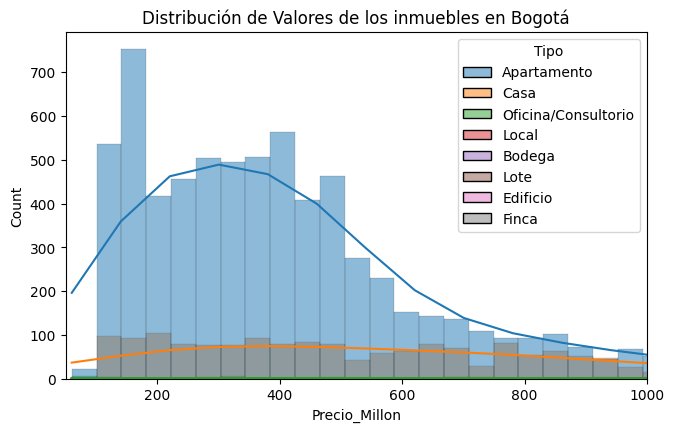

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=t_g)
grafica = sns.histplot(data=inmuebles, x='Precio_Millon', kde=True, hue='Tipo')
grafica.set_title('Distribución de Valores de los inmuebles en Bogotá')
plt.xlim((50,1000))
# plt.ylim((0,20))
# plt.savefig('/content/drive/MyDrive/inmersion_datos/valor_inmuebles.png',format='png')
plt.show()

## Desafío 2

1. Estudiar mejor el histograma de valores, seleccionar 3 tipos de inmuebles (Refinar el gráfico: Títulos, aumentar el tamaño de labels, colores, conclusión de la información)

2. Precio del m2 por barrio y hacer el gráfico más adecuado para esta nueva variable.

#### punto 1:

Seleccionar 3 tipos de inmuebles
Filtrar el DataFrame para quedarte solo con los inmuebles de tres tipos específicos, por ejemplo: Locales, Bodegas y Oficinas. Esto lo hacemos porque En el gráfico anterior, la gran cantidad de Apartamentos y Casas hacía que el resto de categorías pasaran prácticamente desapercibidas, dificultando la comparación. Al enfocarnos solo en estos tres tipos, buscamos visualizar mejor sus diferencias y particularidades en cuanto a los valores de los inmuebles.

In [33]:
tipos_seleccionados = ['Local', 'Bodega', 'Oficina/Consultorio']
inmuebles_filtrados = inmuebles[inmuebles['Tipo'].isin(tipos_seleccionados)]

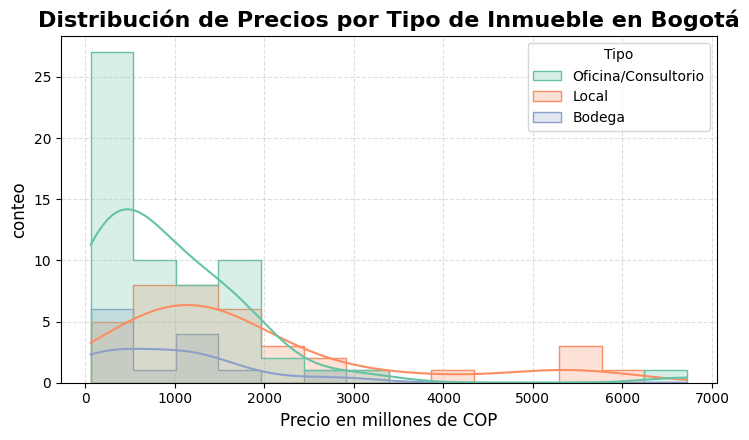

In [34]:
plt.figure(figsize=t_g)
grafica = sns.histplot(data=inmuebles_filtrados,
                       x='Precio_Millon',
                       hue='Tipo',
                       kde=True,
                       palette='Set2',
                       element='step',
                       stat='count')

grafica.set_title('Distribución de Precios por Tipo de Inmueble en Bogotá', fontsize=16, fontweight='bold')
grafica.set_xlabel('Precio en millones de COP', fontsize=12)
grafica.set_ylabel('conteo', fontsize=12)
# plt.xlim(0, 4000)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# plt.legend(title='Tipo de Inmueble')#, title_fontsize='13', fontsize='11')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


#### Punto 2

Para tener una perspectiva más precisa sobre el valor relativo de los inmuebles, se crea una nueva variable llamada Precio por metro cuadrado (Precio_m2), que se obtiene dividiendo el precio total del inmueble por su área. Esta métrica permite comparar barrios independientemente del tamaño promedio de las propiedades.

Luego, se calcula el precio promedio por metro cuadrado por barrio y se grafican los resultados para identificar qué zonas tienen un valor más alto o más bajo. Esto es especialmente útil para quienes buscan invertir o entender mejor la valorización de ciertas áreas de Bogotá.

<ipython-input-35-1dd870027888>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=precio_m2_barrio.values, x=precio_m2_barrio.index, palette='viridis')


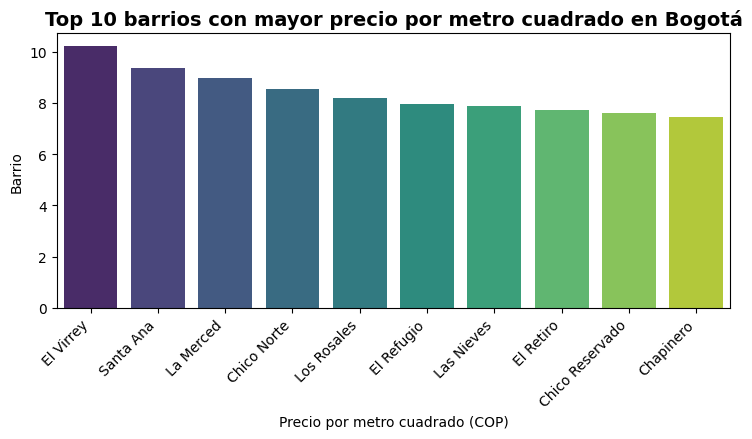

In [35]:
# Creamos una nueva columna con el precio por metro cuadrado
inmuebles['Precio_m2'] = inmuebles['Precio_Millon'] / inmuebles['Area']

# Agrupamos por barrio y calculamos el promedio del precio por m2
precio_m2_barrio = inmuebles.groupby('Barrio')['Precio_m2'].mean().sort_values(ascending=False).head(10)

# Gráfico
plt.figure(figsize=t_g)
# sns.barplot(x=precio_m2_barrio.values, y=precio_m2_barrio.index, palette='viridis')

sns.barplot(y=precio_m2_barrio.values, x=precio_m2_barrio.index, palette='viridis')

plt.title('Top 10 barrios con mayor precio por metro cuadrado en Bogotá', fontsize=14, fontweight='bold')
plt.xlabel('Precio por metro cuadrado (COP)')
plt.ylabel('Barrio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Clase 3

### PROFUNDIZANDO EL ANÁLISIS EXPLORATORIO
Tras realizar un elaborado trabajo para tratar los datos con valores numéricos y lograr utilizarlos en el análisis, llegó el momento de explorar un poco más estos datos, creando nuevas variables (feature engineering), discutiendo la mejor manera de calcular el promedio y los problemas al utilizar promedios de promedios en los análisis, además de explorar otros gráficos con Seaborn.

Será una clase cargada de discusiones, estadísticas y visualizaciones interesantes, incluso conceptos comerciales.

**Análisis de la distribución del precio por metro cuadrado por barrio.**

Luego de calcular el precio por metro cuadrado para cada inmueble, se realiza un gráfico de tipo boxplot (diagrama de caja) para analizar la distribución de precios en distintos barrios de Bogotá.

Este tipo de gráfico es útil porque no se limita a mostrar un valor promedio, sino que nos permite observar:

*   La mediana (valor central) del precio por m² en cada barrio.
*   La dispersión de los precios (rango intercuartílico), lo que indica qué tan homogéneo es el mercado en esa zona.
*   Presencia de valores atípicos (outliers), que podrían representar inmuebles inusualmente caros o baratos para ese barrio.
*   Comparaciones visuales rápidas entre barrios, ayudando a identificar cuáles tienen precios más elevados, más dispersión o más estabilidad.

Este análisis es muy útil para detectar zonas con mercados más consistentes o barrios con alta variabilidad de precios, lo cual puede deberse a diferencias en la calidad de las construcciones, ubicación específica dentro del barrio, o errores de carga en los datos.

<ipython-input-36-0ab4d92c7132>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=inmuebles_top, x='Barrio', y='Precio_m2', palette='Set3')


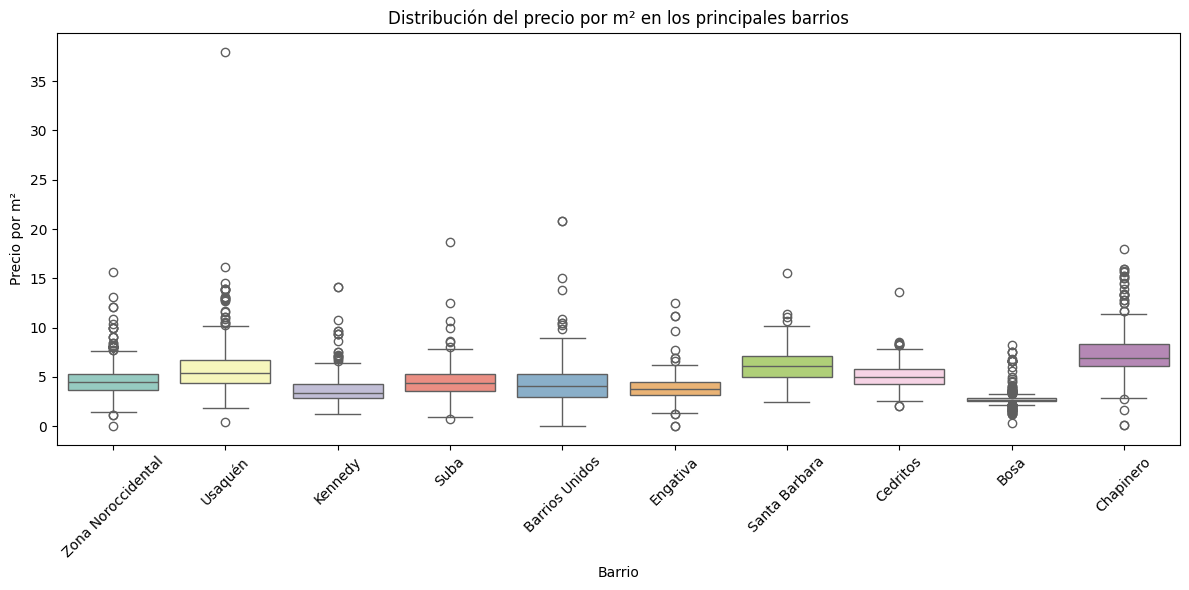

In [36]:
# Elegimos algunos barrios para que el gráfico no quede saturado
barrios_top = inmuebles['Barrio'].value_counts().head(10).index
inmuebles_top = inmuebles[inmuebles['Barrio'].isin(barrios_top)]

# Creamos el boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data=inmuebles_top, x='Barrio', y='Precio_m2', palette='Set3')
plt.xticks(rotation=45)
plt.title('Distribución del precio por m² en los principales barrios')
plt.ylabel('Precio por m²')
plt.xlabel('Barrio')
plt.tight_layout()
plt.show()

### Parte 2 de la clase 3

En esta segunda parte del análisis, vamos a enriquecer nuestro estudio de los inmuebles de Bogotá incorporando datos estadísticos oficiales provistos por el **DANE** (Departamento Administrativo Nacional de Estadística), la entidad responsable de la producción de estadísticas en Colombia.

Utilizaremos información de la Encuesta Multipropósito de Bogotá, una herramienta diseñada para recolectar datos clave sobre las condiciones socioeconómicas, características del entorno urbano y calidad de vida de los habitantes de la ciudad. Esta encuesta permite a las autoridades realizar un seguimiento más preciso de las condiciones en los distintos barrios y tomar decisiones informadas sobre políticas públicas.

La inclusión de estos datos en nuestro proyecto nos permitirá analizar el valor de los inmuebles no solo desde sus características físicas, sino también considerando factores del entorno que pueden influir en el precio, como la calidad del barrio, el acceso a servicios públicos, la percepción de seguridad y otros indicadores relevantes.

👉 Podés consultar más sobre esta base de datos en el siguiente enlace: [Encuesta Multipropósito de Bogotá - DANE](https://microdatos.dane.gov.co/index.php/catalog/743)

In [37]:
# el encoding es el codigo con el cual esta configurado ese dataset. en este caso se vio que era ese 'Latin-1" asi que se puso.
# vio que el separados de columnas es el ';' asi que tmb lo puse porque si no se ve raro.
datos_raw = pd.read_csv('/content/drive/MyDrive/CURSOS/Alura Latam - Inmersion de Datos/Identificación (Capítulo A).csv', sep = ';',encoding='latin-1')
datos_raw.head(5)


,DIRECTORIO,DPTO,MPIO,CLASE,COD_LOCALIDAD,NOMBRE_LOCALIDAD,COD_UPZ_GRUPO,NOMBRE_UPZ_GRUPO,ESTRATO2021,NOMBRE_ESTRATO,FEX_C
0,3004346.00,11,11001,1,3.00,Santa Fe,814.00,SANTA FE: Las Nieves + Sagrado Corazón,11001187,SANTA FE: Las Nieves + Sagrado Corazón,"13,2266692027239"
1,3004347.00,11,11001,1,14.00,Los Mártires,37.00,Santa Isabel,11001162,Santa Isabel,"17,8555889419101"
2,3004348.00,11,11001,1,3.00,Santa Fe,814.00,SANTA FE: Las Nieves + Sagrado Corazón,11001187,SANTA FE: Las Nieves + Sagrado Corazón,"10,0286103658331"
3,3004349.00,11,11001,1,1.00,Usaquén,803.00,USAQUÉN: Country Club + Santa Bárbara,11001176,USAQUÉN: Country Club + Santa Bárbara,"28,6502122142802"
4,3004350.00,11,11001,1,1.00,Usaquén,803.00,USAQUÉN: Country Club + Santa Bárbara,11001176,USAQUÉN: Country Club + Santa Bárbara,"24,4684068319009"


In [38]:
# filtramos solo los de la capital
datos_raw = datos_raw.loc[datos_raw.MPIO == 11001]
datos_raw.shape

(86504, 11)

In [39]:
datos_b = pd.read_csv('/content/drive/MyDrive/CURSOS/Alura Latam - Inmersion de Datos/Datos de la vivenda y su entorno (Capítulo B).csv',sep=';',encoding='latin-1')
datos_c = pd.read_csv('/content/drive/MyDrive/CURSOS/Alura Latam - Inmersion de Datos/Condiciones habitacionales del hogar (Capítulo C).csv',sep=';',encoding='latin-1')
datos_e = pd.read_csv('/content/drive/MyDrive/CURSOS/Alura Latam - Inmersion de Datos/Composición del hogar y demografía (Capítulo E).csv',sep=';',encoding='latin-1')
datos_h = pd.read_csv('/content/drive/MyDrive/CURSOS/Alura Latam - Inmersion de Datos/Educación (Capitulo H).csv',sep=';',encoding='latin-1')
datos_l = pd.read_csv('/content/drive/MyDrive/CURSOS/Alura Latam - Inmersion de Datos/Percepción sobre las condiciones de vida y el desempeño institucional (Capítulo L).csv',sep=';',encoding='latin-1')
datos_k = pd.read_csv('/content/drive/MyDrive/CURSOS/Alura Latam - Inmersion de Datos/Fuerza de trabajo (Capítulo K).csv',sep=';',encoding='latin-1')

<ipython-input-39-b284f4200b13>:2: DtypeWarning: Columns (4,25,30,47) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_c = pd.read_csv('/content/drive/MyDrive/CURSOS/Alura Latam - Inmersion de Datos/Condiciones habitacionales del hogar (Capítulo C).csv',sep=';',encoding='latin-1')
<ipython-input-39-b284f4200b13>:3: DtypeWarning: Columns (66) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_e = pd.read_csv('/content/drive/MyDrive/CURSOS/Alura Latam - Inmersion de Datos/Composición del hogar y demografía (Capítulo E).csv',sep=';',encoding='latin-1')
<ipython-input-39-b284f4200b13>:4: DtypeWarning: Columns (26,81) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_h = pd.read_csv('/content/drive/MyDrive/CURSOS/Alura Latam - Inmersion de Datos/Educación (Capitulo H).csv',sep=';',encoding='latin-1')
<ipython-input-39-b284f4200b13>:5: DtypeWarning: Columns (114,117,122,126,164,166,168) have 

Una vez que tenemos diferentes fuentes de información, el siguiente paso natural es combinar o “mergear” tablas. Esta técnica nos permite cruzar datos entre distintos DataFrames para enriquecer nuestro análisis y responder preguntas más complejas.

Por ejemplo, si tenemos una tabla con información sobre inmuebles y otra con datos socioeconómicos por barrio, podemos unirlas a través de la columna “Barrio”. Esto nos permitirá relacionar características del entorno con el valor de los inmuebles, como el nivel educativo promedio, el acceso a servicios o la percepción de seguridad.

En resumen, el merge nos ayuda a:

*   Aumentar el contexto de los datos
*   Comparar variables de distintas fuentes
*   Construir modelos más informados y realistas



In [47]:
datos_dane = pd.merge(datos_raw,datos_b,on='DIRECTORIO', how='left')
datos_dane = pd.merge(datos_dane,datos_c,on='DIRECTORIO', how='left')
datos_dane = pd.merge(datos_dane,datos_e,on='DIRECTORIO', how='left', suffixes=('_dfd', '_dfe'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238559 entries, 0 to 238558
Columns: 281 entries, DIRECTORIO to FEX_C_dfe
dtypes: float64(140), int64(126), object(15)
memory usage: 511.4+ MB


In [48]:
print('tamaño del nuevo df mergeado:' , datos_dane.shape)
datos_dane.info()

tamaño del nuevo df mergeado: (238559, 281)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238559 entries, 0 to 238558
Columns: 281 entries, DIRECTORIO to FEX_C_dfe
dtypes: float64(140), int64(126), object(15)
memory usage: 511.4+ MB
